In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [32]:
correio = "analises_bases_unidas/bases/base_final_correio_do_povo_completo.xlsx"

In [33]:
df = pd.read_excel(correio)
df.shape

(210, 7)

In [34]:
df.head()

ano                                              links           nome  \
0  2009  https://www.correiodopovo.com.br/not%C3%ADcias...  esquizofrenia   
1  2010  https://www.correiodopovo.com.br/not%C3%ADcias...  esquizofrenia   
2  2010  https://www.correiodopovo.com.br/not%C3%ADcias...  esquizofrenia   
3  2010  https://www.correiodopovo.com.br/not%C3%ADcias...  esquizofrenia   
4  2010  https://www.correiodopovo.com.br/not%C3%ADcias...  esquizofrenia   

                               paragrafos_resgatados  \
0  ['Em entrevista, a governadora considerou "inc...   
1  ['Dependentes químicos eram mantidos de forma ...   
2  ['Dependentes químicos eram mantidos de forma ...   
3  ['Dependentes químicos eram mantidos de forma ...   
4  ['Os pacientes internados em uma clínica\xa0pa...   

                              paragrafos_tratados_sw  metaforico_pred  \
0  entrevista governadora considerou incoerente p...                1   
1  dependentes químicos eram mantidos irregular p...                0   
2  juizado infância juventude passo fundo norte c...                0   
3  encontraram pacientes sexos estavam adolescent...                0   
4  pacientes internados clínica recuperação depen...                0   

  metaforico  
0        sim  
1        nao  
2        nao  
3        nao  
4        nao

In [35]:
df["paragrafos_tratados_sw"] = df["paragrafos_tratados_sw"].apply(str)

In [36]:
print("Quantidade de Metafóricos: \n")
df.metaforico.value_counts()

Quantidade de Metafóricos: 



nao    159
sim     51
Name: metaforico, dtype: int64

In [37]:
print("Quantidade percentual de Metafóricos: \n")
df.metaforico.value_counts(normalize = True)

Quantidade percentual de Metafóricos: 



nao    0.757143
sim    0.242857
Name: metaforico, dtype: float64

In [38]:
grp = df.groupby(["ano", "metaforico"], as_index = False).size()
grp_ano = df.groupby(["ano"], as_index = False).size().rename(columns = {"size": "qtd_ano"})
grp1 = grp.merge(grp_ano, on = "ano", how = "left")
grp1["percentual"] = (grp1["size"] / grp1["qtd_ano"]) * 100

grp_prop = grp.pivot_table(index = ["ano"], columns = ["metaforico"], values = ["size"]).reset_index()
grp_prop.columns = ["ano", "nao", "sim"]
grp_prop["proporcao"] = grp_prop["sim"] / grp_prop["nao"]

grp2 = grp1.merge(grp_prop[["ano","proporcao"]], on = "ano", how = "left")

grp2.head()

ano metaforico  size  qtd_ano  percentual  proporcao
0  2009        nao     1        3   33.333333   2.000000
1  2009        sim     2        3   66.666667   2.000000
2  2010        nao    13       16   81.250000   0.230769
3  2010        sim     3       16   18.750000   0.230769
4  2011        nao     6       11   54.545455   0.833333

# Gráficos em Linhas

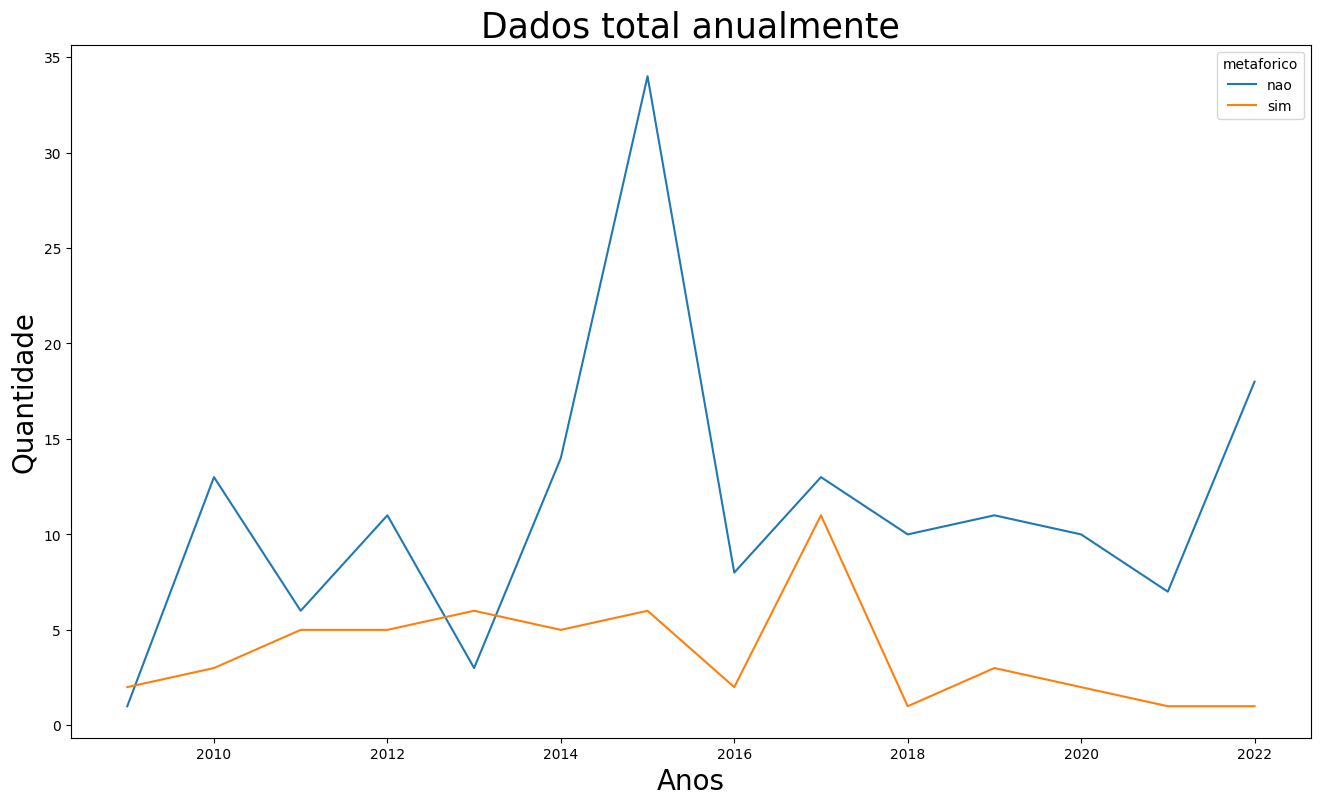

In [39]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(x = "ano", y = "size", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize = 20)
ax = ax

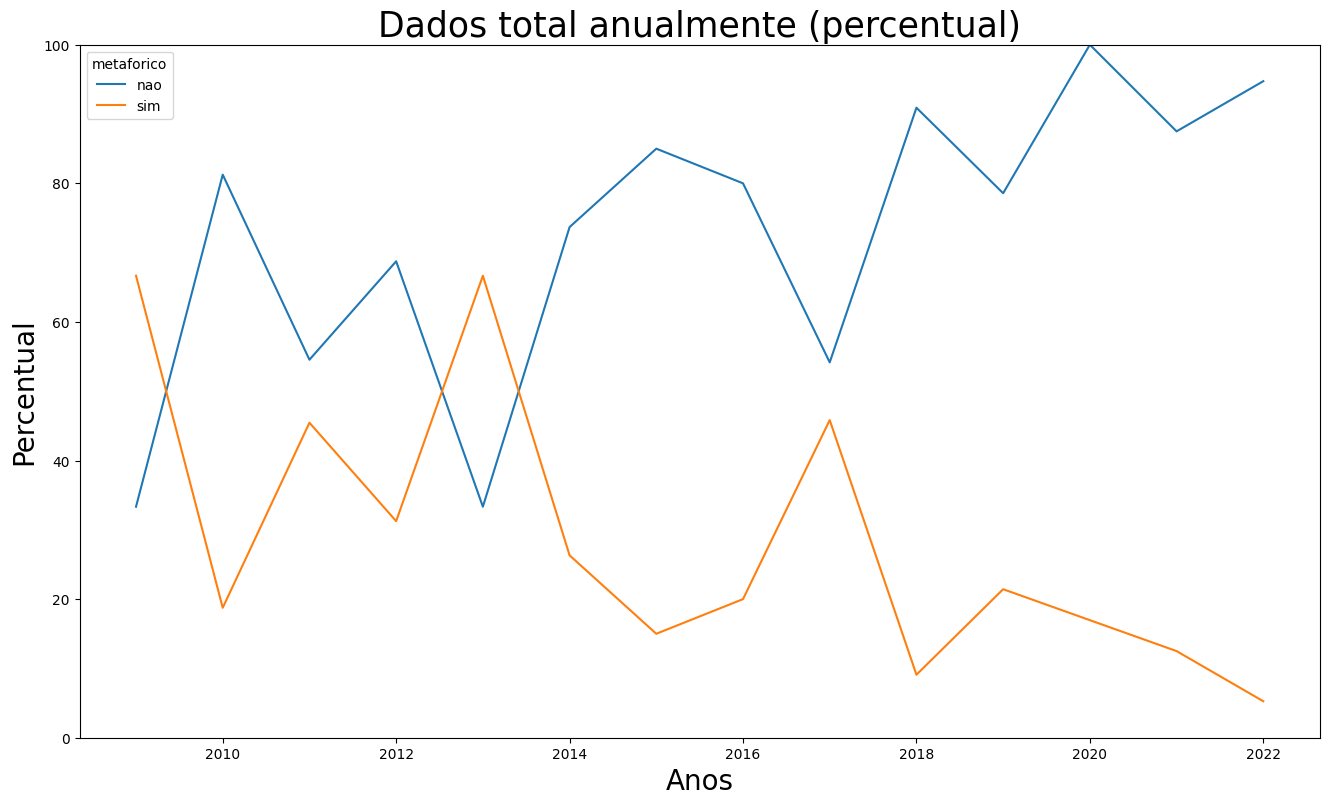

In [40]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(x = "ano", y = "percentual", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente (percentual)", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Percentual", fontsize = 20)
ax.set_ylim(0, 100)
ax = ax

# Gráficos em barras

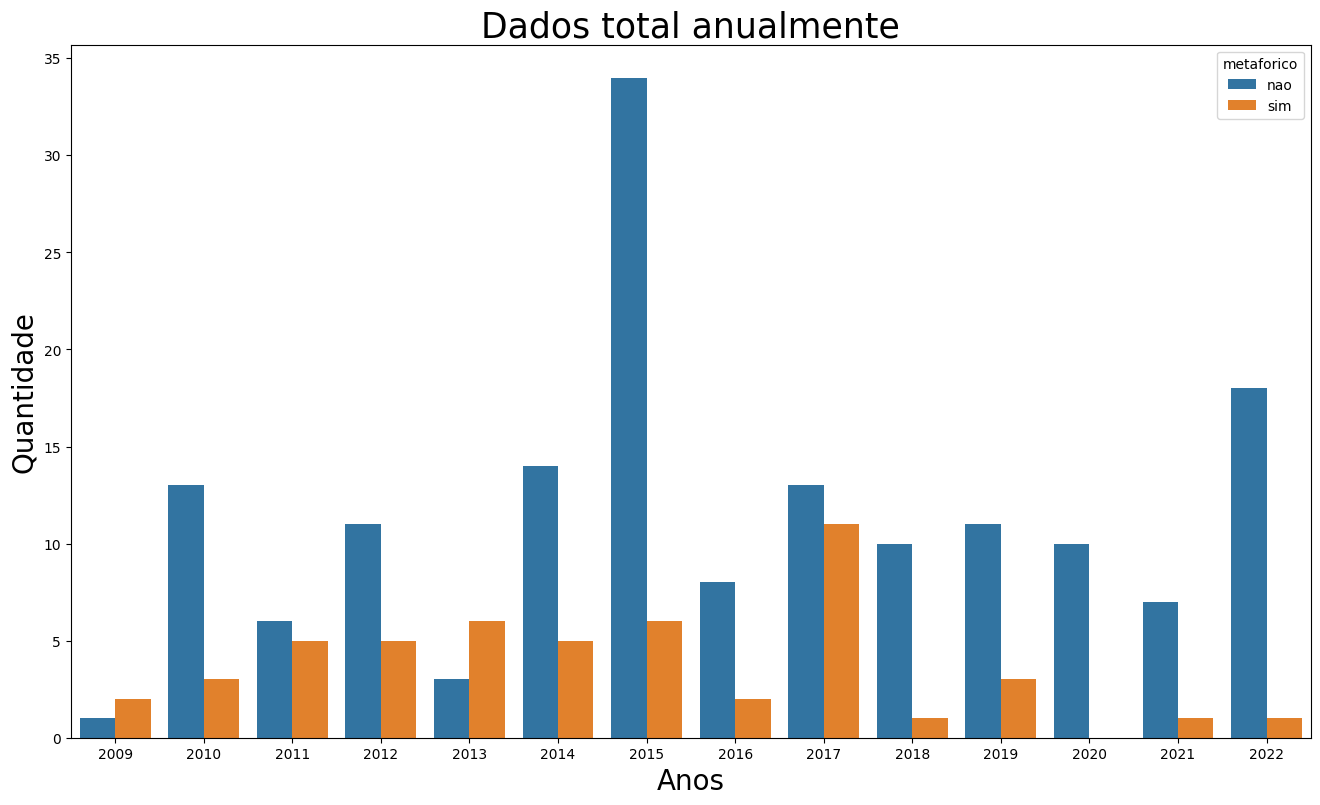

In [41]:
plt.figure(figsize= (16, 9))
ax = sns.barplot(x = "ano", y = "size", hue = "metaforico", data = grp2)
ax.set_title("Dados total anualmente", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize = 20)
ax = ax

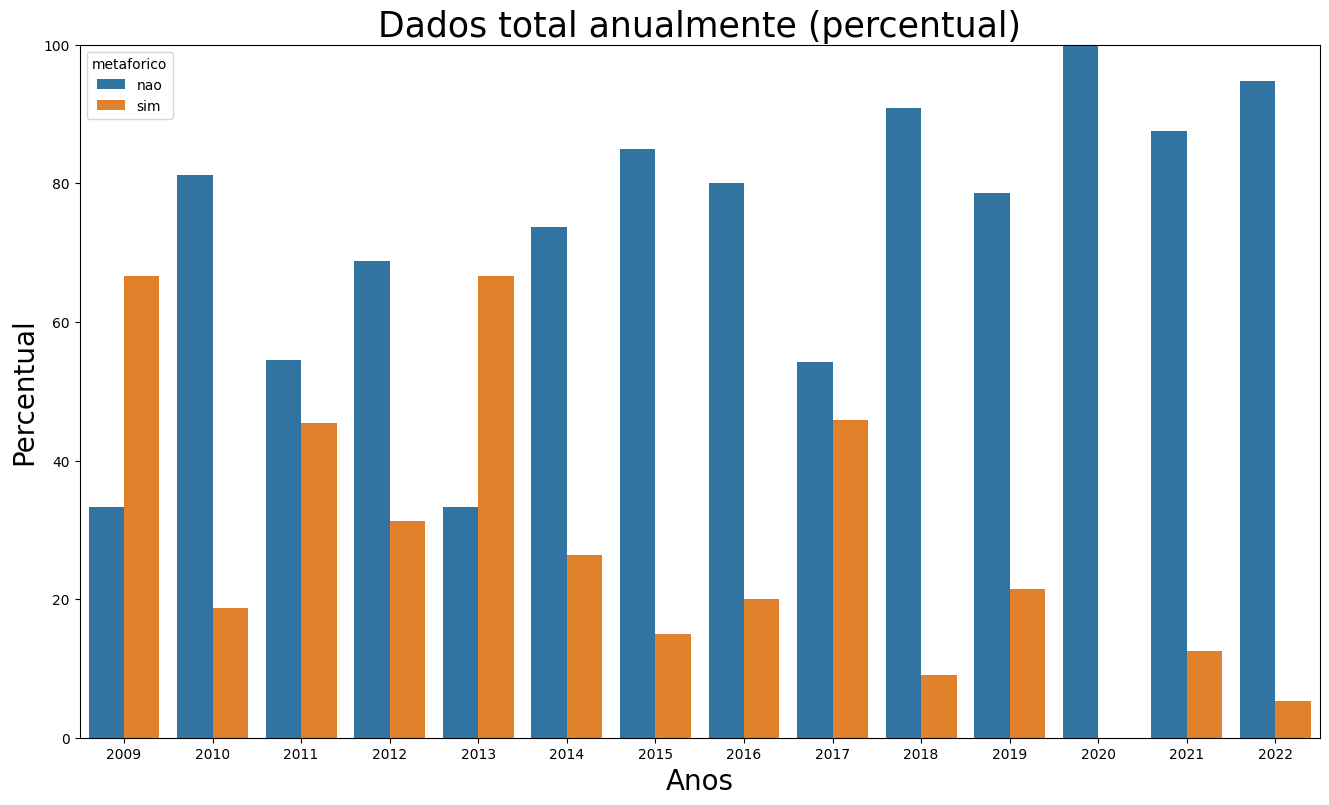

In [42]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = "ano", y = "percentual", data = grp2, hue = "metaforico")
ax.set_title("Dados total anualmente (percentual)", fontsize = 25)
ax.set_xlabel("Anos", fontsize = 20)
ax.set_ylabel("Percentual", fontsize = 20)
ax.set_ylim(0, 100)
ax = ax

# Nuvens de palavras completas 

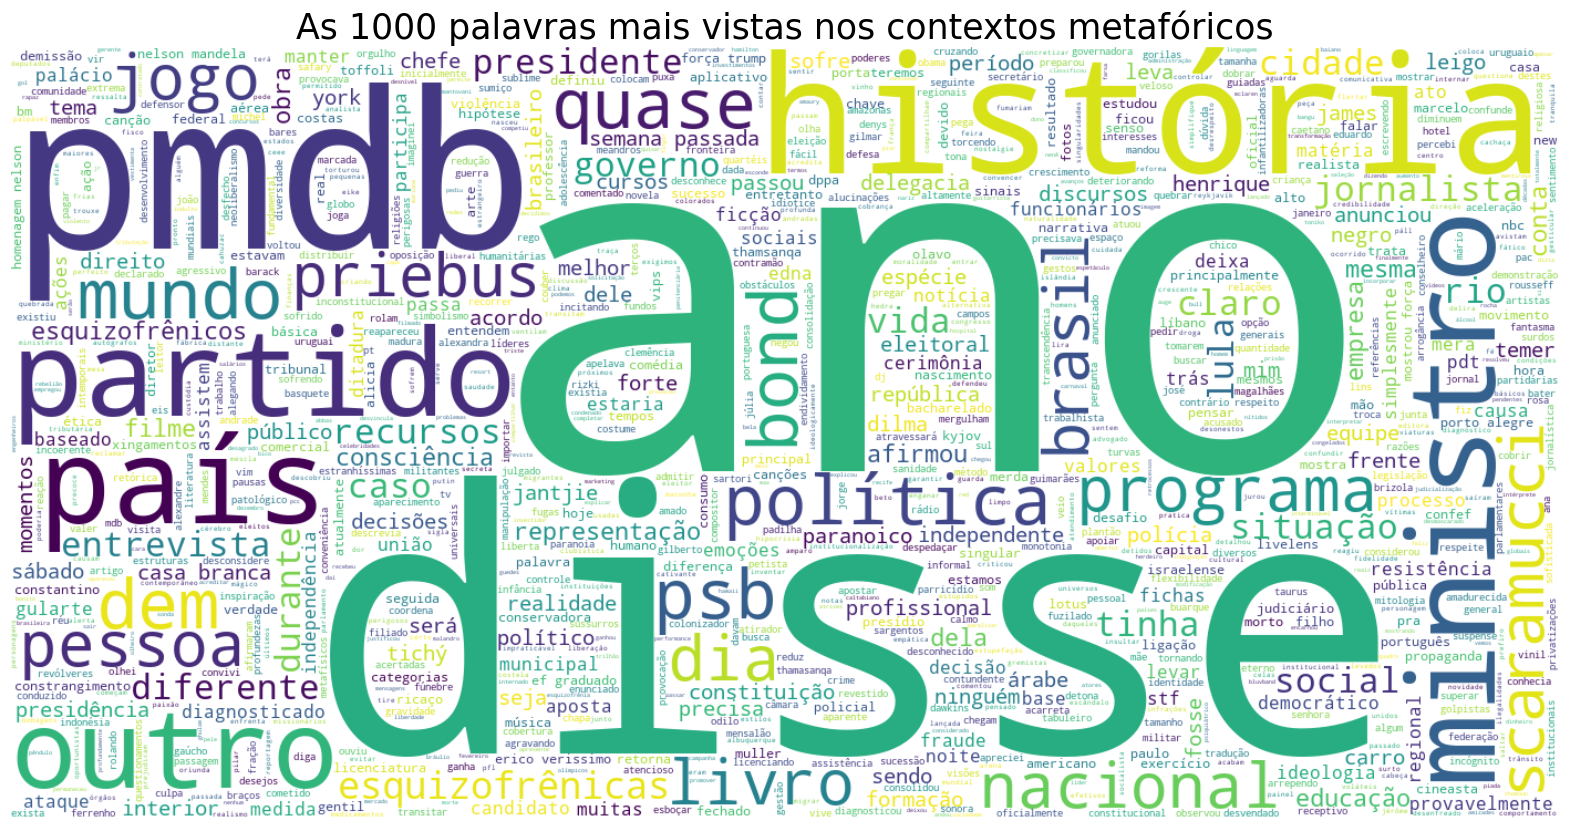

In [43]:
wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

bloco = ' '.join(df.query("metaforico == 'sim'").paragrafos_tratados_sw) # Passar o bloco é padrão
lista = bloco.split(" ") # assim posso remover algumas palavras

palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia"]

lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
bloco_sem_especificas = " ".join(lista_sem_especificas)

wc.generate(bloco_sem_especificas)
# wc.generate(bloco)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("As 1000 palavras mais vistas nos contextos metafóricos", fontsize = 25)
plt.show()

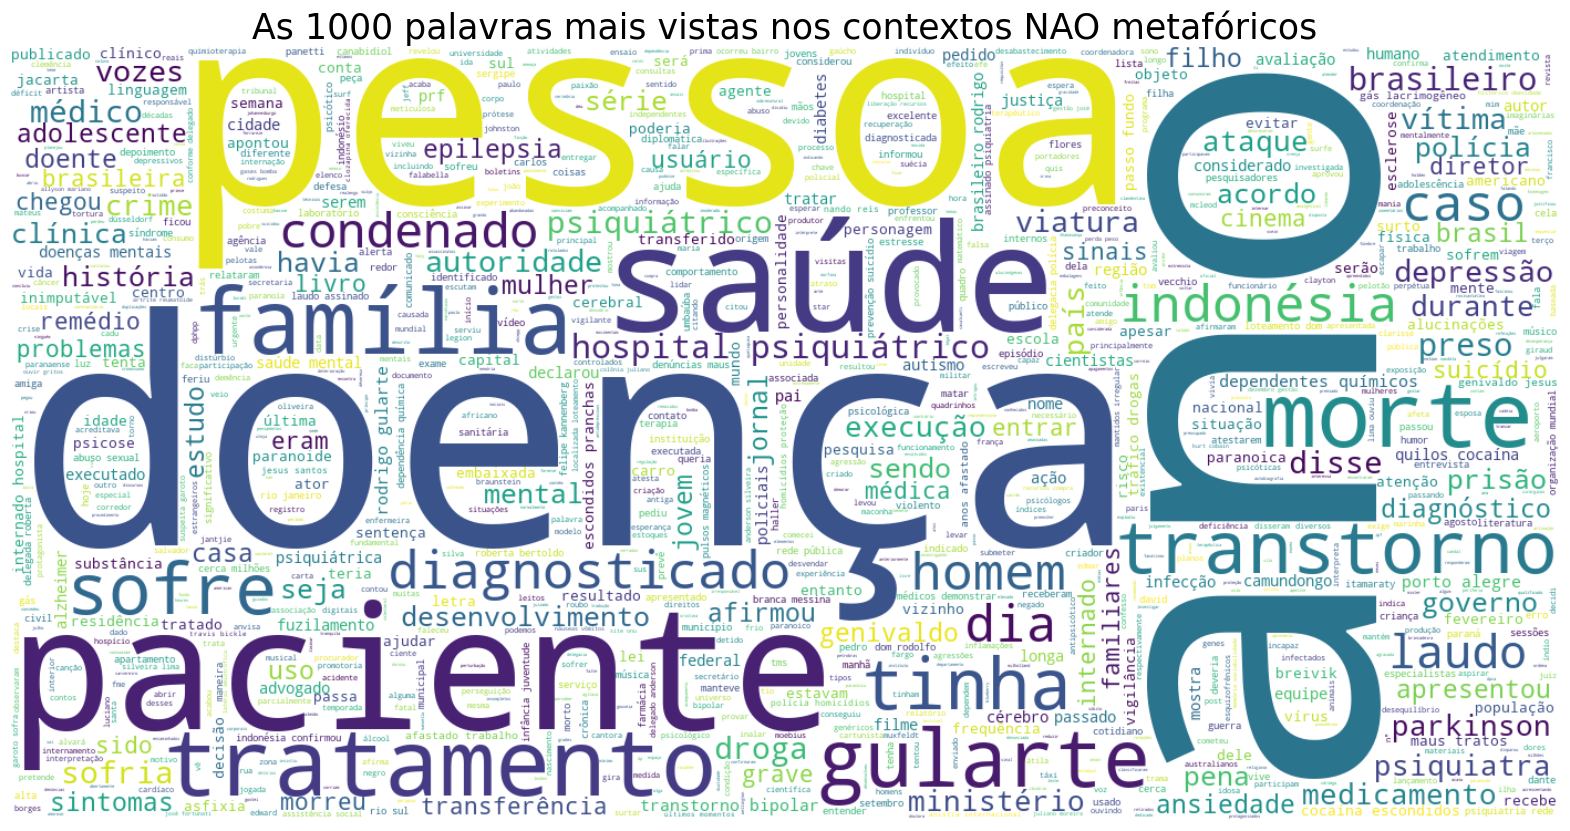

In [44]:
wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

bloco = ' '.join(df.query("metaforico == 'nao'").paragrafos_tratados_sw.apply(str)) # Passar o bloco é padrão
lista = bloco.split(" ") # assim posso remover algumas palavras

palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia"]

lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
bloco_sem_especificas = " ".join(lista_sem_especificas)

wc.generate(bloco_sem_especificas)
# wc.generate(bloco)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("As 1000 palavras mais vistas nos contextos NAO metafóricos", fontsize = 25)
plt.show()

# Nuvens de palavras por ano

In [45]:
def nuvem_palavras(ano, num):
    bloco = ' '.join(df.query(f"ano == {ano} and metaforico == '{num}'").paragrafos_tratados_sw) # Passar o bloco é padrão
    lista = ' '.join(df.query(f"ano == {ano} and metaforico == '{num}'").paragrafos_tratados_sw).split(" ") # assim posso remover algumas palavras
    
    palavras_removidas = ["esquizofrênico", "esquizofrênica", "esquizofrenico","esquizofrenica", "há", "esquizofrenia"]
    
    lista_sem_especificas = [palavra for palavra in lista if palavra not in palavras_removidas]
    bloco_sem_especificas = " ".join(lista_sem_especificas)
    
    wc.generate(bloco_sem_especificas)
    # wc.generate(bloco)
    plt.figure(figsize=(20,20))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    if num == 'nao':
        plt.title(f"{ano} | As 1000 palavras mais vistas nos contextos CLASSIFICADO COMO NAO metafóricos ({ano})", fontsize = 25)
        plt.show()
    else: 
        plt.title(f"{ano} | As 1000 palavras mais vistas nos contextos CLASSIFICADO COMO metafóricos ({ano})", fontsize = 25)
        plt.show()

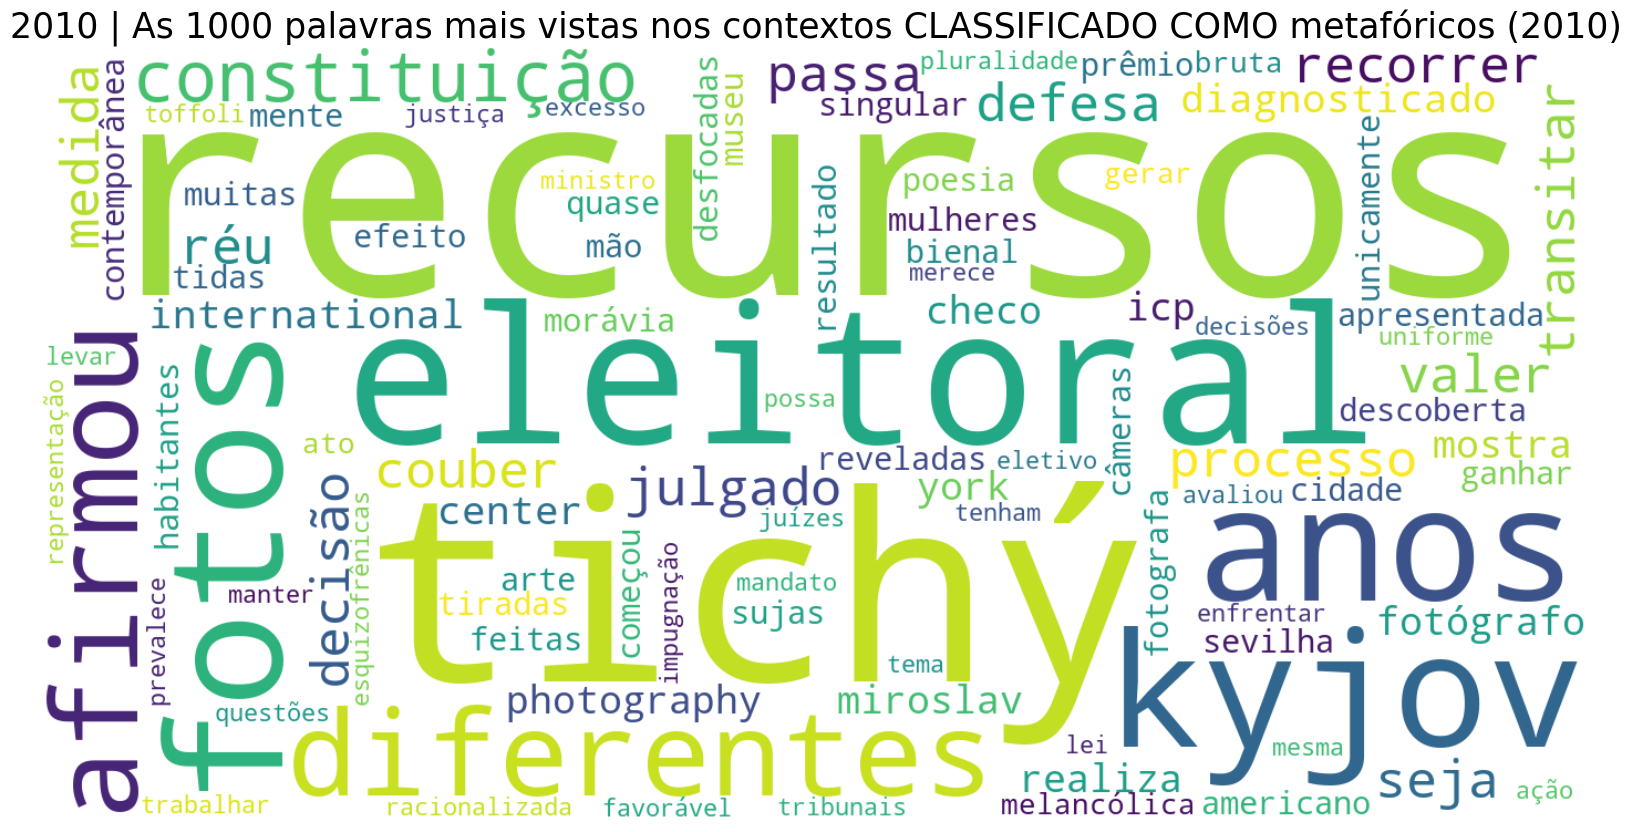

In [46]:
nuvem_palavras("2010", "sim")

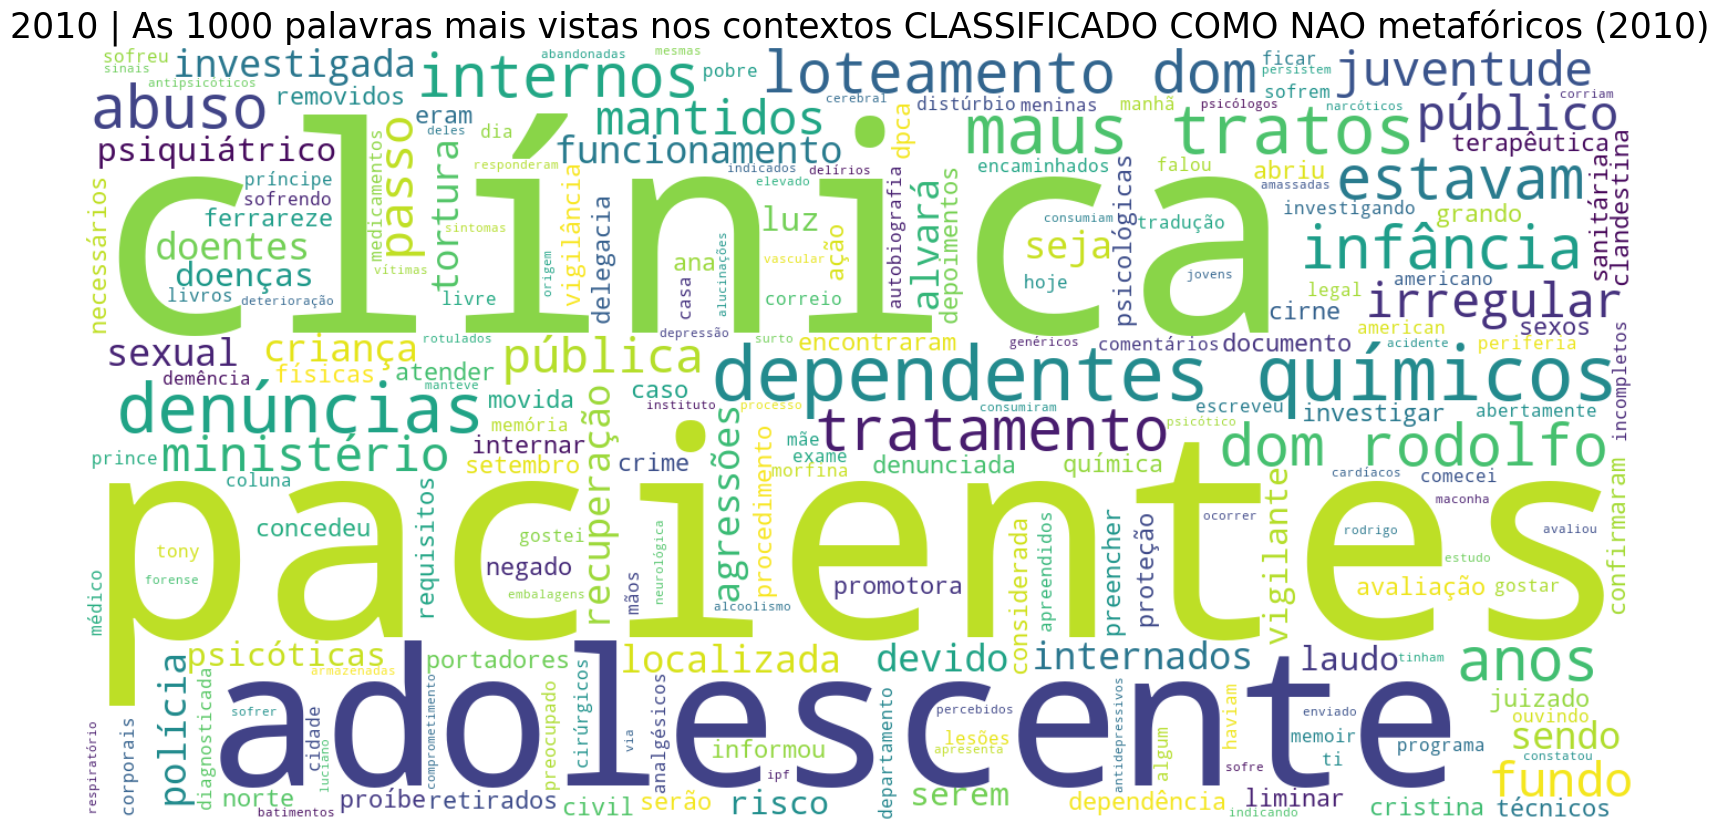

In [47]:
nuvem_palavras("2010", "nao")

In [48]:
# nuvem_palavras("2020", "sim")

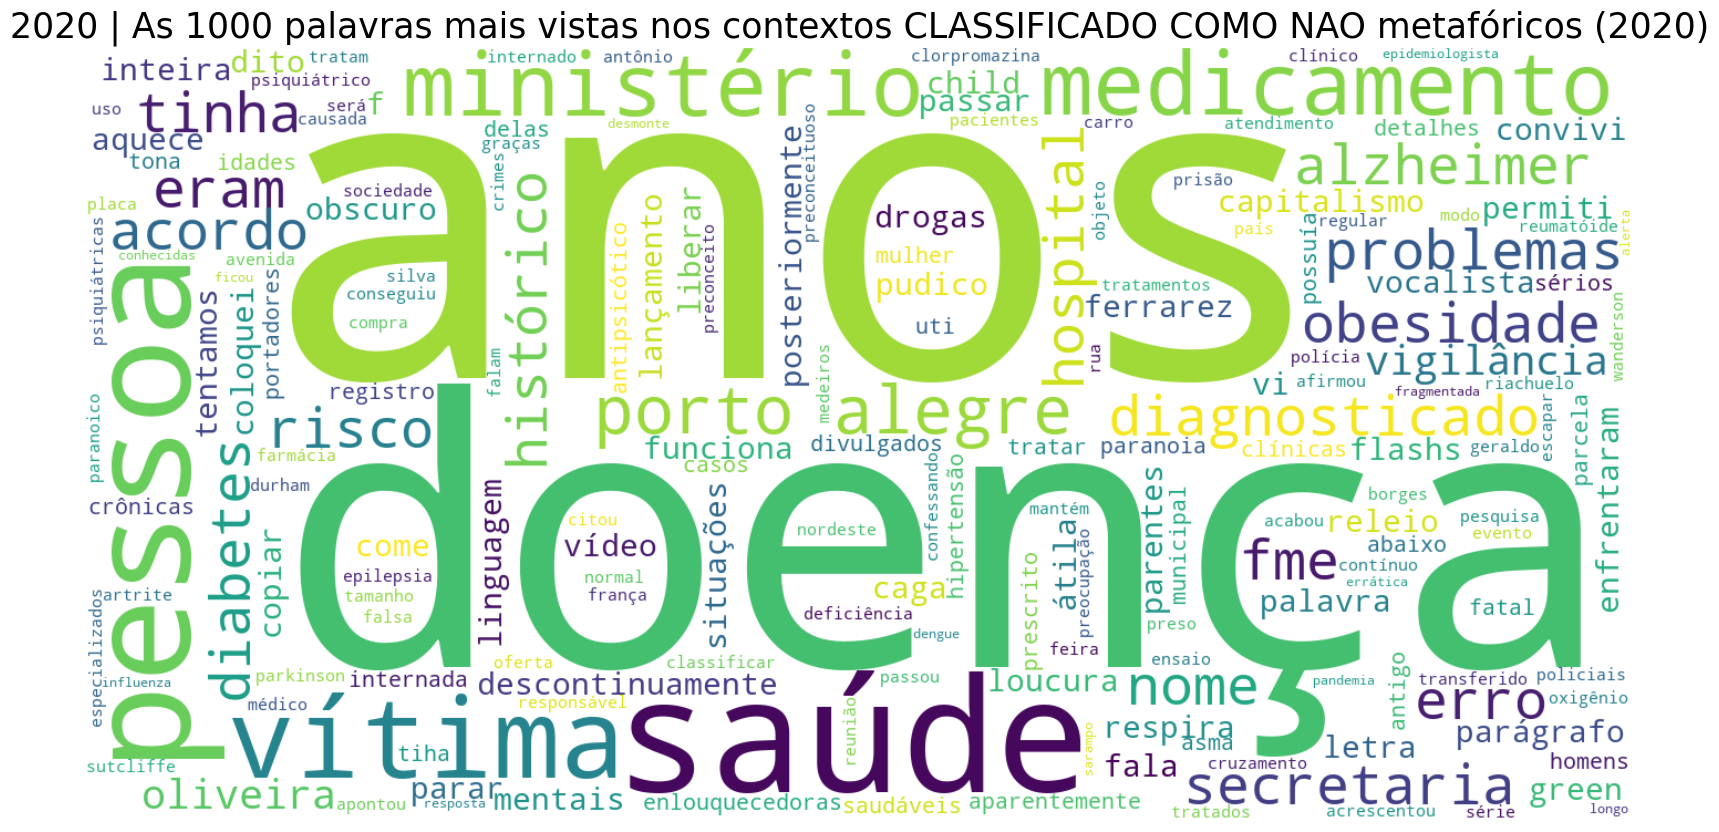

In [49]:
nuvem_palavras("2020", "nao")

In [50]:
!jupyter nbconvert --to html --no-input analise_correio_do_povo.ipynb

[NbConvertApp] Converting notebook analise_correio_do_povo.ipynb to html
[NbConvertApp] Writing 7027405 bytes to analise_correio_do_povo.html
